In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/Users/elgin/anaconda3/envs/python_data_project/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Exploring the number of roles

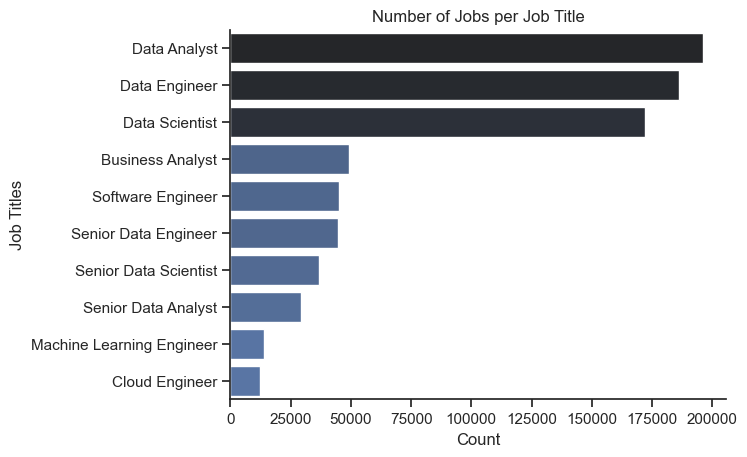

In [5]:
df_plot = df['job_title_short'].value_counts().to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_title_short', hue='count', palette='dark:b_r', legend=False)
sns.despine()

plt.title('Number of Jobs per Job Title')
plt.xlabel('Count')
plt.ylabel('Job Titles')
plt.show()

### Exploring Countries

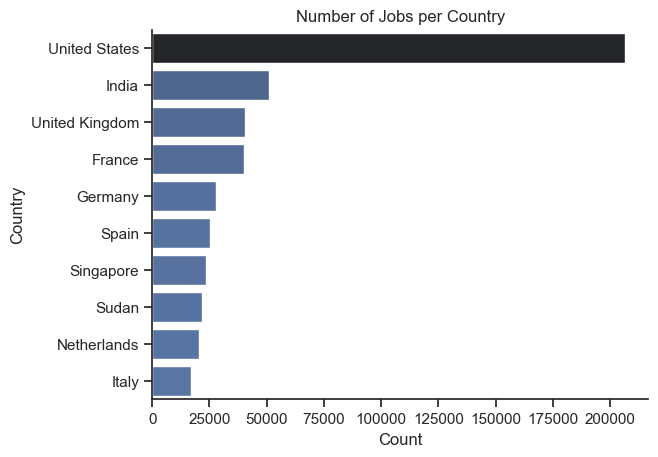

In [7]:
df_plot = df['job_country'].value_counts().to_frame().head(10)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_country', hue='count', palette='dark:b_r', legend=False)
sns.despine()

plt.title('Number of Jobs per Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()


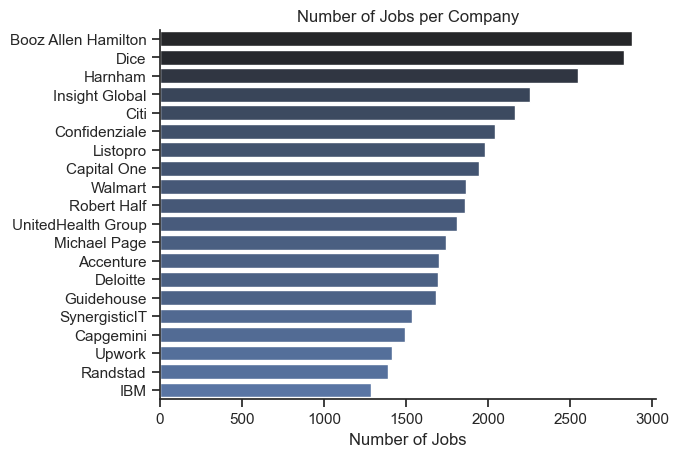

In [11]:
df_plot = df['company_name'].value_counts().to_frame()[1:].head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

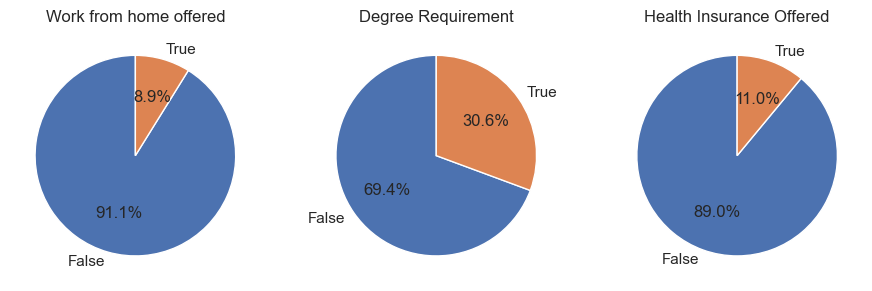

In [12]:
dict_column = {
    'job_work_from_home': 'Work from home offered',
    'job_no_degree_mention':'Degree Requirement',
    'job_health_insurance':'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize = (11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)
plt.show()

## US Specific EDA for Data Analyst

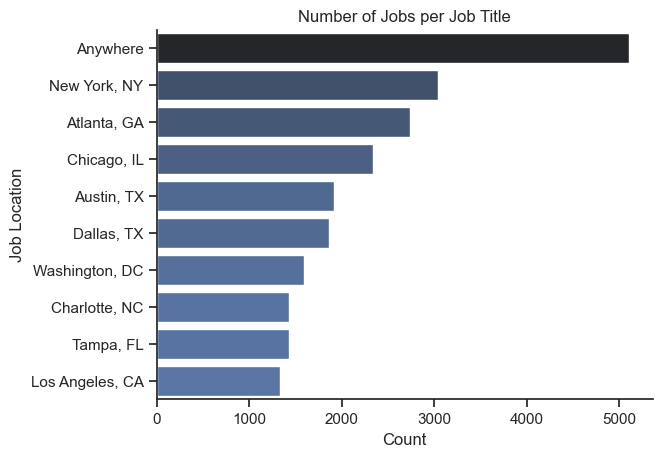

In [14]:
df_us = df[(df['job_country']=='United States') & (df['job_title_short']=='Data Analyst')]

df_plot = df_us['job_location'].value_counts().to_frame().head(10)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()

plt.title('Number of Jobs per Job Title')
plt.xlabel('Count')
plt.ylabel('Job Location')
plt.show()

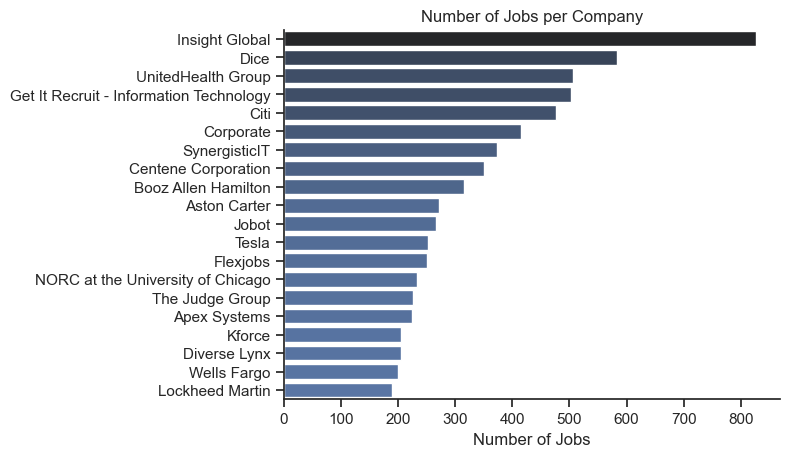

In [15]:
df_plot = df_us['company_name'].value_counts().to_frame()[1:].head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

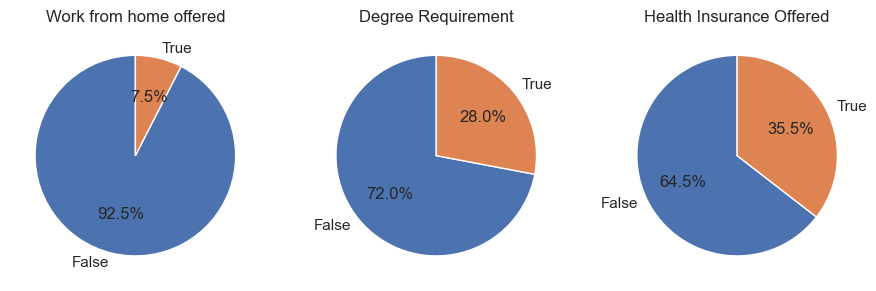

In [16]:
dict_column = {
    'job_work_from_home': 'Work from home offered',
    'job_no_degree_mention':'Degree Requirement',
    'job_health_insurance':'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize = (11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_us[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)
plt.show()